<a href="https://colab.research.google.com/github/JuanCruzY/3k9tarde/blob/main/Lab_1_Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/acSOZRh.png)

# Laboratorio N° 1

# Parte 1: Introducción

### Ejercicio 1: Creando Tensores Complejos
Generar un tensor llamado x cuyo contenido sea el siguiente:

![Imgur](https://i.imgur.com/rfaKGUG.png)

El tensor debe construirse sin escribir manualmente los valores.

In [ ]:
#inserte su código aquí
import torch
import math

x = torch.arange(0, 2*3*5*2, step=2).reshape(2, 3, 5)

print(x)

tensor([[[ 0,  2,  4,  6,  8],
         [10, 12, 14, 16, 18],
         [20, 22, 24, 26, 28]],

        [[30, 32, 34, 36, 38],
         [40, 42, 44, 46, 48],
         [50, 52, 54, 56, 58]]])


### Ejercicio 2: Trabajando con Broadcasting
Tienes un tensor $A$ con forma (3, 2, 4), y un vector v con 6 elementos. Tu tarea es hacer los cambios necesarios para multiplicar $A$ por $v$ de manera que:


*   Cada fila de $A$ se multiplique por el elemento correspondiente de $v$. Es decir, la primera fila debería multiplicarse por 6, la segunda por 5 y así sucesivamente.


In [ ]:
import torch

A = torch.arange(24).reshape(3, 2, 4)  # Tensor base
v = torch.tensor([6,5,4,3,2,1])  # Vector

print(A)
print(v)


tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]]])
tensor([6, 5, 4, 3, 2, 1])


**Pistas:**
1. Necesitas hacer que `v` tenga una forma compatible con `A`.
2. Usa `reshape()` o `view()` para reorganizar `v`.
3. Piensa en `broadcasting`: PyTorch expandirá dimensiones automáticamente si están en el lugar correcto.


In [ ]:
# Inserta aquí los cambios necesarios para poder multiplicar A por v
import torch

A = torch.arange(24).reshape(3, 2, 4)
v = torch.tensor([6,5,4,3,2,1]).reshape(3,2,1)  # Acá no se puede usar (2,1) porque se esta cambiando la forma de un
                                                # vector existente que si o si tiene 6 elementos (no se esta creando uno)
mult = A*v
print(A)

print(mult)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]]])
tensor([[[ 0,  6, 12, 18],
         [20, 25, 30, 35]],

        [[32, 36, 40, 44],
         [36, 39, 42, 45]],

        [[32, 34, 36, 38],
         [20, 21, 22, 23]]])


### **Ejercicio 3: Filtrando Imágenes de Bolsos del Dataset FashionMNIST**

**Objetivo:**  
Descargar el dataset `FashionMNIST`, filtrar las imágenes correspondientes a bolsos (label 8) y almacenarlas en un tensor. Luego, visualizar algunas de esas imágenes para comprobar que se ha realizado el filtrado correctamente.

**Instrucciones:**

1. Usa `torchvision` para descargar el dataset `FashionMNIST` y aplicar la transformación adecuada para convertir las imágenes a tensores.
2. Filtra las imágenes que tengan la etiqueta 8, que corresponde a los bolsos.
3. Apila esas imágenes en un solo tensor usando `torch.stack`.
4. Implementa una función que permita visualizar algunas de las imágenes de bolsos almacenadas en el tensor.




torch.Size([6000, 28, 28])


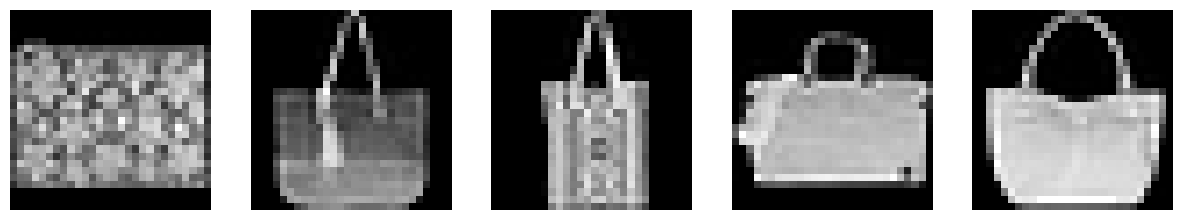

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Transformación para convertir las imágenes a tensores
transform = transforms.Compose([transforms.ToTensor()])

# Descargar el dataset FashionMNIST
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Filtrar las imágenes de bolsos (label 8)

def obtener_bolsos(dataset):
    #inserte su código aquí
    imagenes_filtradas = []
    for i in range(len(dataset)):
      if dataset[i][1] == 8:
        imagenes_filtradas.append(dataset[i][0].squeeze())
    filtrado = torch.stack(imagenes_filtradas)
    return filtrado


# Función para visualizar algunas imágenes de bolsos
def visualizar_bolsos(tensor_bolsos, num_imagenes=5):
    fig, axes = plt.subplots(1, num_imagenes, figsize=(15, 15))
    for i in range(num_imagenes):
        axes[i].imshow(tensor_bolsos[i].squeeze(), cmap='gray')
        axes[i].axis('off')
    plt.show()

# Obtener las imágenes de bolsos
bolsos_tensor = obtener_bolsos(dataset)

# Mostrar la forma del tensor resultante
print(bolsos_tensor.shape)

# Visualizar algunas imágenes de bolsos
visualizar_bolsos(bolsos_tensor)




### Ejercicio 4: Creación de un Dataset Personalizado para Reconocimiento de Placas de Matrícula

**Objetivo**

Crear un dataset personalizado en PyTorch para trabajar con imágenes de placas de matrícula de diferentes estados de EE.UU.



In [ ]:
## descarga el dataset en la carpeta new plates
!gdown https://drive.google.com/uc?id=1FMkstj2JgQOySU0D6mH7Dtr-hts2cqSD
!unzip plates.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: new plates/train/MASSACHUSETTS/093.jpg  
  inflating: new plates/train/MASSACHUSETTS/094.jpg  
  inflating: new plates/train/MASSACHUSETTS/095.jpg  
  inflating: new plates/train/MASSACHUSETTS/096.jpg  
  inflating: new plates/train/MASSACHUSETTS/097.jpg  
  inflating: new plates/train/MASSACHUSETTS/098.jpg  
  inflating: new plates/train/MASSACHUSETTS/099.jpg  
  inflating: new plates/train/MASSACHUSETTS/100.jpg  
  inflating: new plates/train/MASSACHUSETTS/101.jpg  
  inflating: new plates/train/MASSACHUSETTS/102.jpg  
  inflating: new plates/train/MASSACHUSETTS/103.jpg  
  inflating: new plates/train/MASSACHUSETTS/104.jpg  
  inflating: new plates/train/MASSACHUSETTS/105.jpg  
  inflating: new plates/train/MASSACHUSETTS/106.jpg  
  inflating: new plates/train/MASSACHUSETTS/107.jpg  
  inflating: new plates/train/MASSACHUSETTS/108.jpg  
  inflating: new plates/train/MASSACHUSETTS/109.jpg  
  inflating: ne

**Datos**

El archivo CSV (`plates.csv`) tiene la siguiente estructura:
- `class id`: Identificador numérico de la clase (estado)
- `filepaths`: Ruta a las imágenes de las placas
- `labels`: Nombre del estado al que pertenece la placa (por ejemplo, "ALABAMA")
- `data set`: Indica si la imagen pertenece al conjunto de entrenamiento ("train"), prueba ("test") o validación ("val")

**Requisitos**
1. Implementar una subclase de `torch.utils.data.Dataset` llamada `PlatesDataSet`
2. La clase debe implementar los siguientes métodos:
   - `__init__(self, mode)`: Constructor que inicializa el dataset y filtra las imágenes según el modo ('train', 'test', etc.)
   - `__len__(self)`: Retorna la cantidad de elementos en el dataset
   - `__getitem__(self, index)`: Carga la imagen correspondiente al índice dado y retorna un par (imagen, etiqueta)

**Implementación**

El dataset debe:
1. Cargar el archivo CSV utilizando pandas
2. Filtrar las entradas según el modo especificado (train/test)
3. Almacenar las etiquetas y rutas de las imágenes
4. Implementar el método `__getitem__` para cargar las imágenes bajo demanda


In [ ]:
import pandas as pd
import os
import torch
from torch.utils.data import Dataset
from torchvision.io import read_image
from PIL import Image
import torchvision.transforms as transforms

class PlatesDataSet(Dataset):
    def __init__(self, csv_file='/content/new plates/plates.csv', root_dir='/content/new plates', mode='train', transform=None):
        """
        Inicializa el dataset de placas de matrícula.

        Args:
            csv_file (str): Ruta al archivo CSV con las anotaciones.
            root_dir (str): Directorio con todas las imágenes.
            mode (str): 'train' o 'test' para filtrar las imágenes.
            transform (callable, opcional): Transformaciones opcionales a aplicar a las imágenes.
        """
        #ingrese su código aquí
        self.img_labels=pd.read_csv(csv_file)
        self.img_dir = root_dir
        self.mode = mode
        self.transform = transform

    def __len__(self):
        """
        Retorna el número de imágenes en el dataset.
        """
        #ingrese su código aquí
        return len(self.img_labels)

    def __getitem__(self, index):
        """
        Retorna una imagen y su etiqueta correspondiente.

        Args:
            index (int): Índice del elemento a recuperar.

        Returns:
            tuple: (imagen, etiqueta)
        """
        # Ingrese su código aquí
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[index, 1])
        image = read_image(img_path)
        label = self.img_labels.iloc[index, 2]
        if self.transform:
            image = self.transform(image)
        return image, label


    def get_class_name(self, index):
        """
        Método adicional para obtener el nombre del estado correspondiente a un índice.

        Args:
            index (int): Índice del elemento.

        Returns:
            str: Nombre del estado (ej. 'ALABAMA')
        """
        #ingrese su código aquí
        estado = self.img_labels.iloc[index, 2]
        return estado
training_data = PlatesDataSet()
print(training_data.__len__())
print(training_data.__getitem__(604))
print(training_data.get_class_name(604))

8721
(tensor([[[254, 254, 255,  ..., 253, 252, 254],
         [248, 253, 255,  ..., 255, 253, 253],
         [252, 250, 255,  ..., 251, 250, 253],
         ...,
         [249, 253, 252,  ..., 254, 254, 254],
         [255, 252, 251,  ..., 255, 251, 247],
         [255, 255, 251,  ..., 255, 251, 247]],

        [[255, 254, 247,  ..., 253, 251, 255],
         [250, 253, 253,  ..., 255, 254, 254],
         [255, 252, 254,  ..., 255, 252, 253],
         ...,
         [251, 255, 254,  ..., 254, 255, 255],
         [255, 251, 255,  ..., 254, 255, 255],
         [250, 254, 255,  ..., 254, 255, 255]],

        [[253, 252, 248,  ..., 255, 255, 255],
         [247, 251, 253,  ..., 255, 255, 255],
         [253, 249, 255,  ..., 254, 249, 251],
         ...,
         [250, 254, 253,  ..., 252, 255, 255],
         [250, 247, 250,  ..., 252, 254, 253],
         [244, 247, 251,  ..., 253, 255, 254]]], dtype=torch.uint8), 'ARKANSAS')
ARKANSAS


Una vez implementada tu solución del ejercicio, podés correr las siguientes celdas para verificar que tu dataset funciona. Esta herramienta grafica 5 ejemplos de placas del estado seleccionado, permitiendo verificar visualmente que la carga de imágenes y etiquetas funciona correctamente.

In [ ]:
# @title Función para mostrar los ejemplos del dataset
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
from torch.utils.data import DataLoader

def visualize_state_plates(dataset, state_name, num_examples=5, figsize=(15, 3)):
    """
    Visualiza ejemplos de placas de matrícula de un estado específico.

    Args:
        dataset (PlatesDataSet): Dataset de placas de matrícula
        state_name (str): Nombre del estado (ej. 'ALABAMA')
        num_examples (int): Número de ejemplos a visualizar
        figsize (tuple): Tamaño de la figura

    Returns:
        None: Muestra la visualización directamente
    """
    # Filtrar índices que corresponden al estado solicitado
    state_indices = []

    # Buscar las muestras que corresponden al estado requerido
    for i in range(len(dataset)):
        if dataset.get_class_name(i).upper() == state_name.upper():
            state_indices.append(i)

    if not state_indices:
        print(f"No se encontraron ejemplos para el estado '{state_name}'")
        # Mostrar estados disponibles
        available_states = set(dataset.text_labels)
        print(f"Estados disponibles: {', '.join(sorted(available_states))}")
        return

    # Seleccionar aleatoriamente hasta num_examples
    if len(state_indices) > num_examples:
        selected_indices = random.sample(state_indices, num_examples)
    else:
        selected_indices = state_indices
        print(f"Nota: Solo se encontraron {len(selected_indices)} ejemplos para '{state_name}'")

    # Configurar la figura
    fig, axes = plt.subplots(1, len(selected_indices), figsize=figsize)

    # Asegurar que axes sea siempre una secuencia
    if len(selected_indices) == 1:
        axes = [axes]

    # Mostrar cada imagen
    for i, idx in enumerate(selected_indices):
        # Obtener la imagen y la etiqueta
        image, label = dataset[idx]

        # Convertir tensor a numpy para visualización
        if isinstance(image, torch.Tensor):
            # Si es un tensor, mover a CPU y convertir a numpy
            image_np = image.cpu().numpy()

            # Reorganizar dimensiones si es necesario (C, H, W) -> (H, W, C)
            if image_np.shape[0] == 3:  # Si el canal está en la primera dimensión
                image_np = np.transpose(image_np, (1, 2, 0))
        else:
            image_np = np.array(image)

        # Mostrar la imagen
        axes[i].imshow(image_np)
        axes[i].set_title(f"{state_name}\nID: {idx}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle(f"Ejemplos de placas de matrícula - {state_name}", y=1.05)
    plt.show()

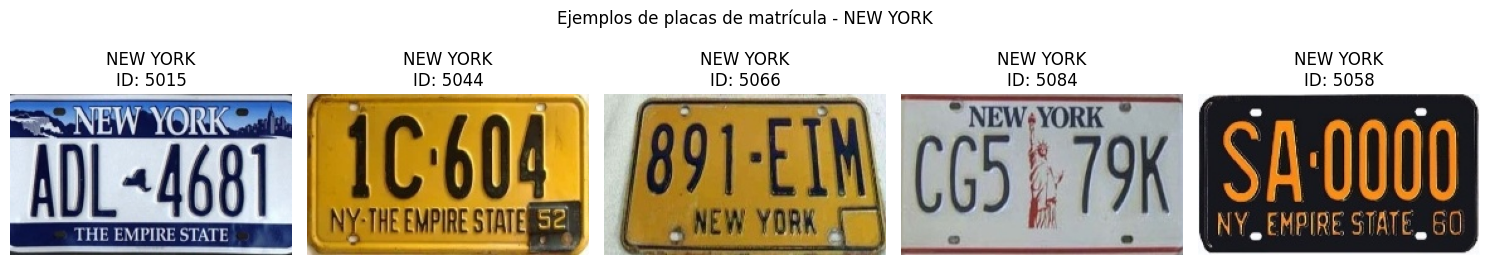

In [ ]:
training_data = PlatesDataSet(mode='train')
state_name = 'NEW YORK'
visualize_state_plates(training_data, state_name)



### Ejercicio 5: Exploración del Gradiente con Autograd

**Investiga y visualiza el gradiente de la siguiente función en el rango [0, 2π] utilizando `autograd` de PyTorch.

$$f(x) = \tan(2x+ \frac{\pi}{2}) $$

**Consideraciones:**

* **Tensor 'x':** Define un tensor 'x' adecuado para el rango y la función dada.
* **Gradiente:** Utiliza `autograd` para calcular el gradiente de f(x) con respecto a x.
* **Visualización:** Crea gráficos que muestren tanto la función original como su gradiente. Asegúrate de que ambos gráficos tengan el eje y limitado entre -5 y 5.

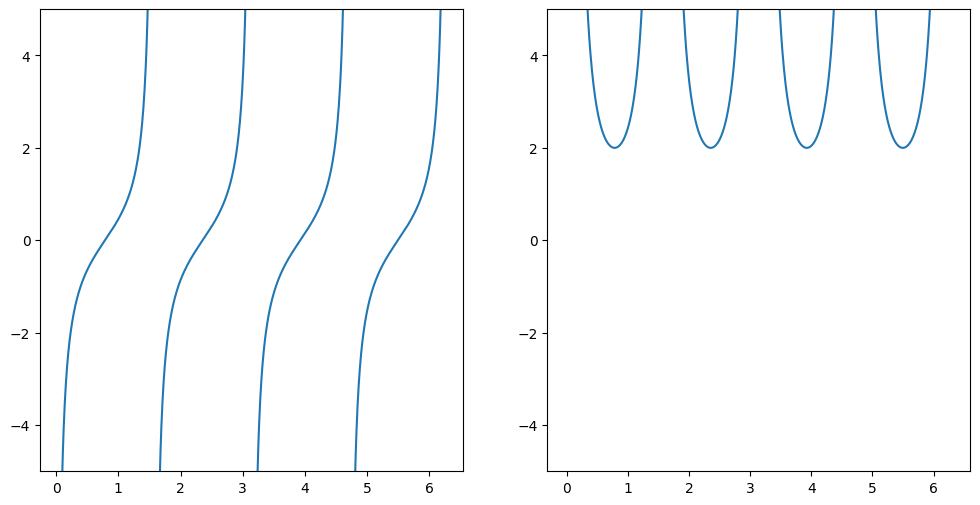

In [ ]:
#inserte su código aquí
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
a = torch.linspace(0., 2. * math.pi, steps=1000, requires_grad=True)
b = torch.tan(2*a+torch.pi/2)
out = b.sum()
out.backward()
b_plot = b.detach()
b_plot[torch.abs(b_plot) > 10] = float('nan')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(a.detach(), b_plot.detach())
plt.ylim(-5, 5)
plt.subplot(1, 2, 2)
plt.plot(a.detach(), a.grad.detach())
plt.ylim(-5, 5)
plt.show()

# Parte 2: Redes de Una Capa

En esta parte del notebook vamos a retomar el ejemplo de la red neuronal entrenada para clasificar FashionMNIST. Si bien ese ejemplo tiene todos los pasos necesarios para entrenar la red, varios de esos pasos sirven para entrenar cualquier otro modelo. Así que vamos a tratar de modularizarlo de manera que el código sea reutilizable.

Arranquemos importando los módulos necesarios.

In [ ]:
import torch
import torch.optim
import torchvision
from IPython import display
from torchvision import transforms
from torch.utils import data

Volvemos a definir la función que crea los Datasets y devuelve los DataLoaders para poder iterar sobre ellos.

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=1),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=1))


También definimos una función que devuelve la cantidad de aciertos del modelo a partir de un tensor de predicciones y otro de etiquetas.

In [ ]:
def accuracy(y_hat, y):
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

Volvemos a definir el modelo con una capa de 10 neuronas para hacer la clasificación e inicializamos sus pesos aleatoriamente con una distribución gaussiana.

In [ ]:
net = torch.nn.Sequential(torch.nn.Flatten(), torch.nn.Linear(784, 10))

def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

Definimos la entropía cruzada como función de perdida y el descenso de gradiente estocástico como algoritmo de optimización.

In [ ]:
loss = torch.nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

Y por último, definimos una función que lleva adelante el entrenamiento completo.

In [ ]:
def train(net, train_iter, test_iter, loss, num_epochs, updater):
  '''
  Lleva adelante el entrenamiento completo llamando a funciones internas
  que modularizan el ciclo de entrenamiento.

    Parámetros:
            net: la red neuronal que se va a entrenar
            train_iter: iterador de datos de entrenamiento
            test_iter: iterador de datos de prueba
            loss: función de perdida a minimizar
            num_epoch: cantidad de épocas a entrenar
            updater: algoritmo de optimización

    Salida:
            metrics: una lista de tuplas (una para cada epoch)
              con las siguientes componentes
              - epoch: número de época
              - L: pérdida calculada
              - Acc: accuracy de entrenamiento calculada
              - TestAcc: accuracy de prueba calculada
  '''
  metrics =[]
  for epoch in range(num_epochs):
      L, Acc = train_epoch(net, train_iter, loss, updater)
      TestAcc = test_accuracy(net, test_iter)
      metric = (epoch + 1, L, Acc, TestAcc)
      print(metric)
      metrics.append(metric)
  return metrics


## Ejercicio 1: `train_epoch()`

Implementar la función `train_epoch()` que lleva adelante el entrenamiento de una época.

In [ ]:
def train_epoch(net, train_iter, loss, updater):
  '''
  Lleva adelante el entrenamiento de una sola época.

    Parámetros:
            net: la red neuronal que se va a entrenar
            train_iter: iterador de datos de entrenamiento
            loss: función de perdida a minimizar
            updater: algoritmo de optimización

    Salida:
            L: pérdida calculada
            Acc: accuracy de entrenamiento calculada
  '''
  # inserte su código aquí
  L = 0.0
  Acc = 0.0
  for X, y in train_iter:
        l = loss(net(X) ,y)
        l.mean().backward()
        updater.step()
        updater.zero_grad()
        L += l.mean()
        #N += l.numel()
        Acc += accuracy(net(X), y)
  return L, Acc




## Ejercicio 2: `test_accuracy()`

Implementar la función `test_accuracy()` que lleva adelante la evaluación de la performance de la red con los datos de prueba.

In [ ]:
def test_accuracy(net, test_iter):
  '''
  Evalúa los resultados del entrenamiento de una sola época.

    Parámetros:
            net: la red neuronal que se va a evaluar
            test_iter: iterador de datos de prueba

    Salida:
            - TestAcc: accuracy de prueba calculada
  '''
  # inserte su código aquí
  TestAcc = 0.0
  for X, y in test_iter:
        #TestN += y.numel()
        TestAcc += accuracy(net(X), y)
  return TestAcc


## Ejercicio 3: Entrenar la red

Utilizar las funciones anteriores para entrenar efectivamente a la red. Entrenarla por 10 epochs y con lotes de tamaño 256.

In [ ]:
import torch
from torch import nn

# Capa lineal con pesos entrenables
capa_lineal = nn.Linear(5, 3)  # De 5 entradas a 3 salidas
relu = nn.ReLU()

# Entrada de ejemplo (1 muestra con 5 características)
X = torch.tensor([[0.5, -0.2, 0.3, -1.0, 0.8]])

# Salida de la capa lineal (antes de ReLU)
salida_lineal = capa_lineal(X)
print("Salida antes de ReLU:\n", salida_lineal)

# Aplicamos ReLU
salida_relu = relu(salida_lineal)
print("Salida después de ReLU:\n", salida_relu)

Salida antes de ReLU:
 tensor([[ 0.7984, -0.1422,  0.8508]], grad_fn=<AddmmBackward0>)
Salida después de ReLU:
 tensor([[0.7984, 0.0000, 0.8508]], grad_fn=<ReluBackward0>)


In [ ]:
#inserte su código aquí
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)
num_epochs = 10
metrics = train(net, train_iter, test_iter, loss, num_epochs, trainer)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 306kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.56MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.23MB/s]


(1, tensor(184.1706, grad_fn=<AddBackward0>), 45787.0, 7899.0)
(2, tensor(134.0393, grad_fn=<AddBackward0>), 49317.0, 7983.0)
(3, tensor(123.4680, grad_fn=<AddBackward0>), 49927.0, 8183.0)
(4, tensor(117.6484, grad_fn=<AddBackward0>), 50362.0, 8193.0)
(5, tensor(114.1415, grad_fn=<AddBackward0>), 50639.0, 8288.0)
(6, tensor(111.4949, grad_fn=<AddBackward0>), 50826.0, 8189.0)
(7, tensor(109.2765, grad_fn=<AddBackward0>), 50957.0, 8269.0)
(8, tensor(107.8409, grad_fn=<AddBackward0>), 51136.0, 8276.0)
(9, tensor(106.2098, grad_fn=<AddBackward0>), 51212.0, 8227.0)
(10, tensor(104.8633, grad_fn=<AddBackward0>), 51262.0, 8282.0)


## Ejercicio 4: Graficar
Graficar la evolución de los valores de el accuracy de entrenamiento, el accuracy de prueba y la pérdida en función de las épocas.

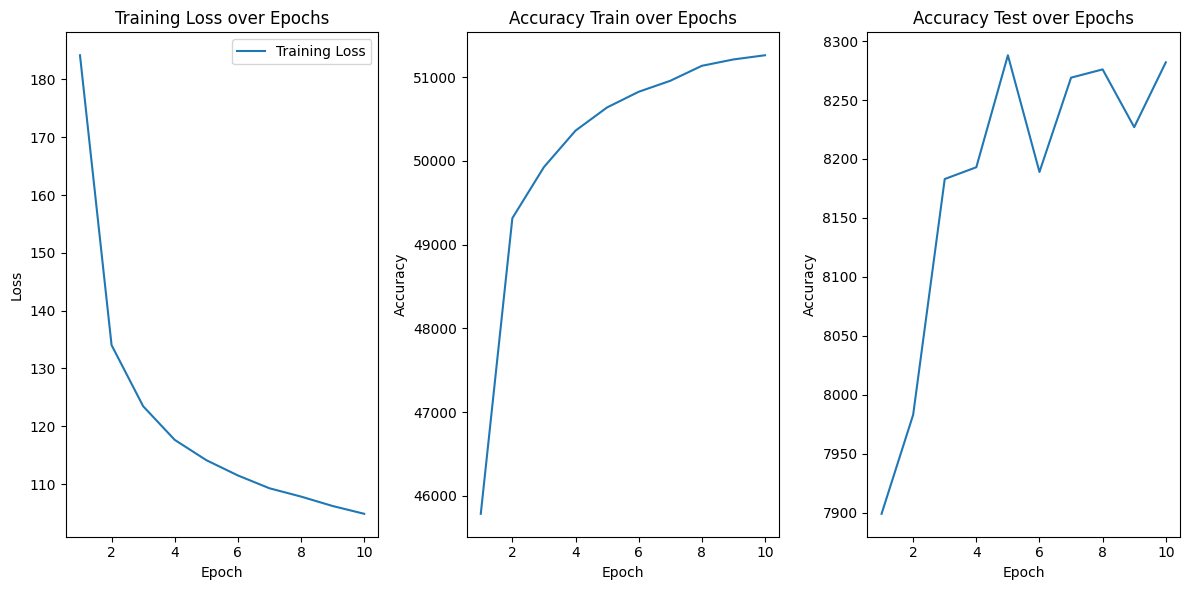

In [ ]:
#inserte su código aquí
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

epochs = [metric[0] for metric in metrics]
losses = [metric[1].item() for metric in metrics]
train_accuracies = [metric[2] for metric in metrics]
test_accuracies = [metric[3] for metric in metrics]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(epochs, losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Train over Epochs')

plt.subplot(1, 3, 3)
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Test over Epochs')

plt.tight_layout()
plt.show()

# Parte 3: Redes Multicapa

En este notebook vamos a usar MLPs para generar un modelo clasificador sobre FashionMNIST así que muchas de las funciones que usamos en los ejercicios de la clase 2 te serán muy útiles.

## Ejercicio 1: Modelo Base

Generar un modelo perceptron multicapa con 2 capas ocultas de 512 y 128
neuronas respectivamente para clasificación sobre el dataset FashionMNIST

In [ ]:
import torch.nn as nn

net1 = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 512),
                    nn.ReLU(),
                    nn.Linear(512, 128),
                    nn.ReLU(),
                    nn.Linear(128, 10))

## Ejercicio 2: Menos Learning Rate

Entrene el modelo por 10 épocas con un tamaño de lote de 256 y un learning rate de 0.3. (Le recomendamos reutilizar las funciones modularizadas de los ejercicios de la clase 2)

In [ ]:
#ingresa tu código aquí
batch_size1 = 256

train_iter1, test_iter1 = load_data_fashion_mnist(batch_size1)

trainer1 = torch.optim.SGD(net1.parameters(), lr=0.03)
num_epochs1 = 10
loss1 = nn.CrossEntropyLoss()

metrics1 = train(net1, train_iter1, test_iter1, loss1, num_epochs1, trainer1)

(1, tensor(349.6807, grad_fn=<AddBackward0>), 34129.0, 6743.0)
(2, tensor(184.9869, grad_fn=<AddBackward0>), 43541.0, 7536.0)
(3, tensor(153.3661, grad_fn=<AddBackward0>), 46825.0, 7532.0)
(4, tensor(136.6039, grad_fn=<AddBackward0>), 48407.0, 7800.0)
(5, tensor(126.9373, grad_fn=<AddBackward0>), 49277.0, 8061.0)
(6, tensor(120.8648, grad_fn=<AddBackward0>), 49867.0, 7997.0)
(7, tensor(114.9783, grad_fn=<AddBackward0>), 50304.0, 8105.0)
(8, tensor(111.7314, grad_fn=<AddBackward0>), 50529.0, 8252.0)
(9, tensor(108.2477, grad_fn=<AddBackward0>), 50882.0, 8192.0)
(10, tensor(105.9461, grad_fn=<AddBackward0>), 51073.0, 8290.0)


### Conclusión

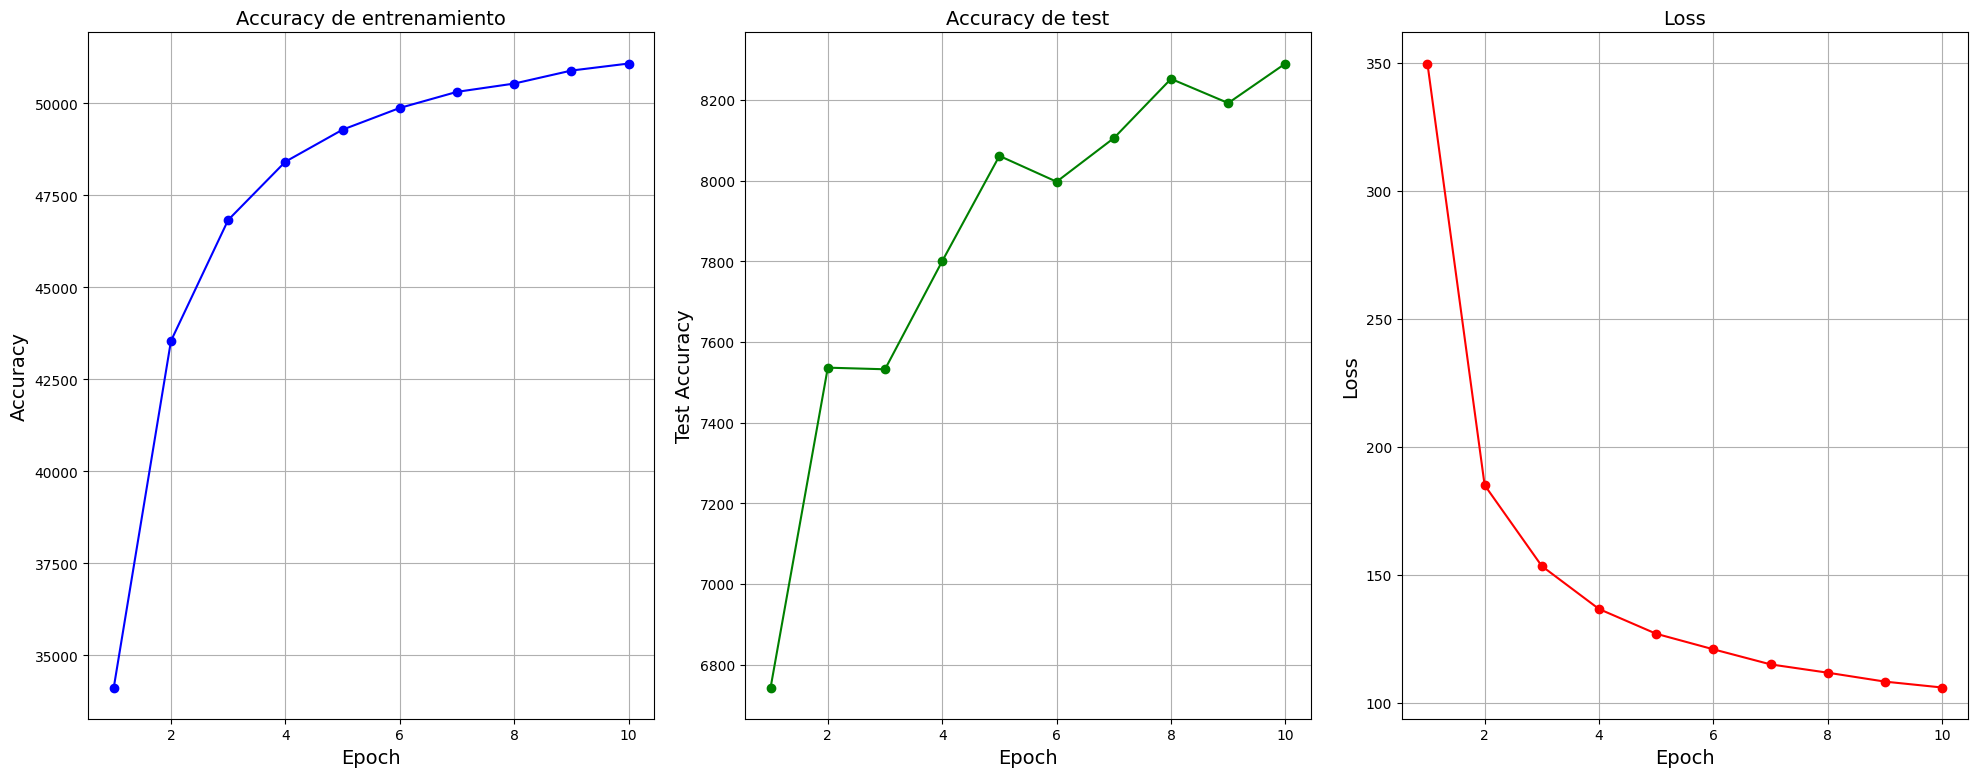

In [ ]:
import matplotlib.pyplot as plt

epochs = [e for (e, _, _, _) in metrics1]
losses = [l.item() for (_, l, _, _) in metrics1]
train_accs = [a for (_, _, a, _) in metrics1]
test_accs = [ta for (_, _, _, ta) in metrics1]

# Crear los gráficos
plt.figure(figsize=(20, 8))

# Gráfico 1: Accuracy de entrenamiento
plt.subplot(1, 3, 1)
plt.plot(epochs, train_accs, marker='o', color='blue')
plt.title("Accuracy de entrenamiento")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# Gráfico 2: Accuracy de test
plt.subplot(1, 3, 2)
plt.plot(epochs, test_accs, marker='o', color='green')
plt.title("Accuracy de test")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.grid(True)

# Gráfico 3: Pérdida (Loss)
plt.subplot(1, 3, 3)
plt.plot(epochs, losses, marker='o', color='red')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()

## Ejercicio 3: Más épocas

A partir del modelo anterior, analice que ocurre si en lugar de entrenar 10 épocas, entrena 20

In [ ]:
#ingresa tu código aquí

import torch.nn as nn

net2 = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 512),
                    nn.ReLU(),
                    nn.Linear(512, 128),
                    nn.ReLU(),
                    nn.Linear(128, 10))

batch_size2 = 256

train_iter2, test_iter2 = load_data_fashion_mnist(batch_size2)

trainer2 = torch.optim.SGD(net2.parameters(), lr=0.03)
num_epochs2 = 20
loss = nn.CrossEntropyLoss()

metrics2 = train(net2, train_iter2, test_iter2, loss, num_epochs2, trainer2)

(1, tensor(353.2081, grad_fn=<AddBackward0>), 34039.0, 6710.0)
(2, tensor(182.8605, grad_fn=<AddBackward0>), 43440.0, 7418.0)
(3, tensor(153.9987, grad_fn=<AddBackward0>), 46584.0, 7717.0)
(4, tensor(138.9680, grad_fn=<AddBackward0>), 48249.0, 7856.0)
(5, tensor(128.2966, grad_fn=<AddBackward0>), 49142.0, 7930.0)
(6, tensor(120.7924, grad_fn=<AddBackward0>), 49666.0, 8019.0)
(7, tensor(116.1106, grad_fn=<AddBackward0>), 50180.0, 7604.0)
(8, tensor(112.4949, grad_fn=<AddBackward0>), 50486.0, 8192.0)
(9, tensor(109.4548, grad_fn=<AddBackward0>), 50711.0, 8149.0)
(10, tensor(107.0177, grad_fn=<AddBackward0>), 50916.0, 8307.0)
(11, tensor(104.6735, grad_fn=<AddBackward0>), 51198.0, 8306.0)
(12, tensor(103.1473, grad_fn=<AddBackward0>), 51349.0, 8347.0)
(13, tensor(101.1449, grad_fn=<AddBackward0>), 51479.0, 8312.0)
(14, tensor(99.7734, grad_fn=<AddBackward0>), 51707.0, 8361.0)
(15, tensor(98.1902, grad_fn=<AddBackward0>), 51812.0, 8409.0)
(16, tensor(96.6608, grad_fn=<AddBackward0>), 51980

### Conclusión

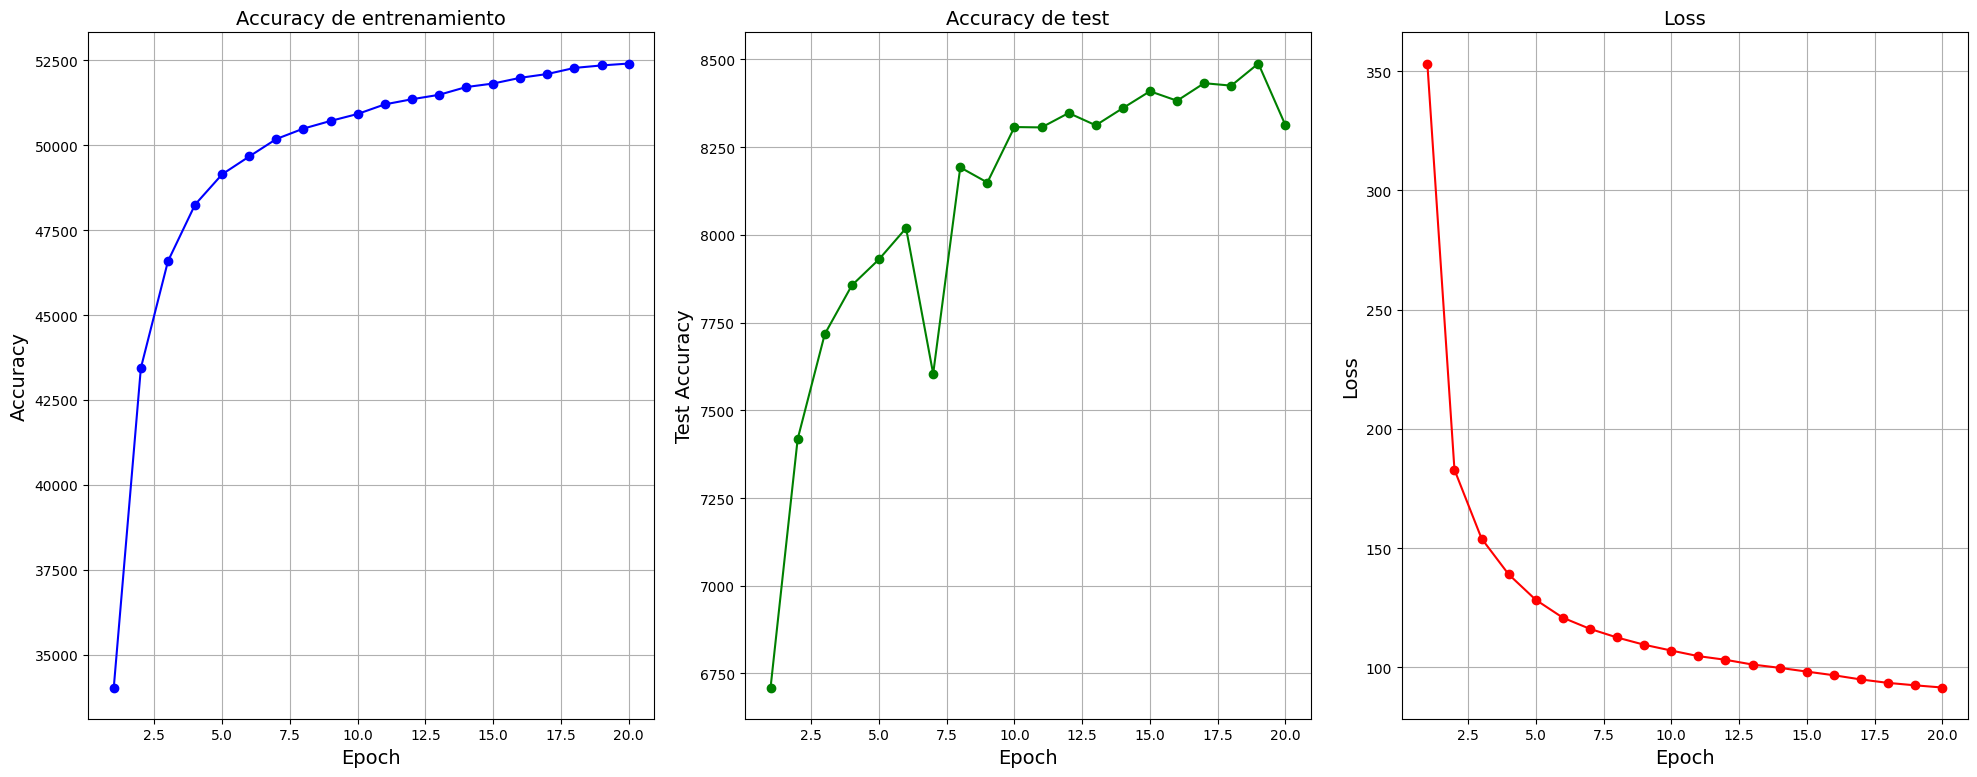

In [ ]:
epochs = [e for (e, _, _, _) in metrics2]
losses = [l.item() for (_, l, _, _) in metrics2]
train_accs = [a for (_, _, a, _) in metrics2]
test_accs = [ta for (_, _, _, ta) in metrics2]

# Crear los gráficos
plt.figure(figsize=(20, 8))

# Gráfico 1: Accuracy de entrenamiento
plt.subplot(1, 3, 1)
plt.plot(epochs, train_accs, marker='o', color='blue')
plt.title("Accuracy de entrenamiento")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# Gráfico 2: Accuracy de test
plt.subplot(1, 3, 2)
plt.plot(epochs, test_accs, marker='o', color='green')
plt.title("Accuracy de test")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.grid(True)

# Gráfico 3: Pérdida (Loss)
plt.subplot(1, 3, 3)
plt.plot(epochs, losses, marker='o', color='red')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()

**Respuesta**: El accuracy de entrenamiento teine una ligera mejora. El accuracy de test parece evolucionar bien hasta antes de la última época. La función de pérdida disminuye por lo que las predicciones están mas cerca de los valores correctos.

## Ejercicio 4: Más Learning Rate

Aumente el learning rate a 1 y entrene nuevamente. ¿Cómo puede explicar lo que pasó?

In [ ]:
#ingresa tu código aquí

import torch.nn as nn

net3 = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 512),
                    nn.ReLU(),
                    nn.Linear(512, 128),
                    nn.ReLU(),
                    nn.Linear(128, 10))

batch_size3 = 256

train_iter3, test_iter3 = load_data_fashion_mnist(batch_size3)

trainer3 = torch.optim.SGD(net3.parameters(), lr=1)
num_epochs3 = 10
loss3 = nn.CrossEntropyLoss()

metrics3 = train(net3, train_iter3, test_iter3, loss3, num_epochs3, trainer3)

(1, tensor(1699.3035, grad_fn=<AddBackward0>), 12095.0, 2014.0)
(2, tensor(414.9210, grad_fn=<AddBackward0>), 13856.0, 1998.0)
(3, tensor(394.3778, grad_fn=<AddBackward0>), 14793.0, 2518.0)
(4, tensor(687.6998, grad_fn=<AddBackward0>), 14080.0, 1714.0)
(5, tensor(595.5173, grad_fn=<AddBackward0>), 13605.0, 2050.0)
(6, tensor(416.1957, grad_fn=<AddBackward0>), 13896.0, 2065.0)
(7, tensor(397.7095, grad_fn=<AddBackward0>), 14367.0, 1983.0)
(8, tensor(661.5157, grad_fn=<AddBackward0>), 8820.0, 1000.0)
(9, tensor(541.3333, grad_fn=<AddBackward0>), 6842.0, 1000.0)
(10, tensor(541.3651, grad_fn=<AddBackward0>), 6837.0, 1000.0)


### Conclusión

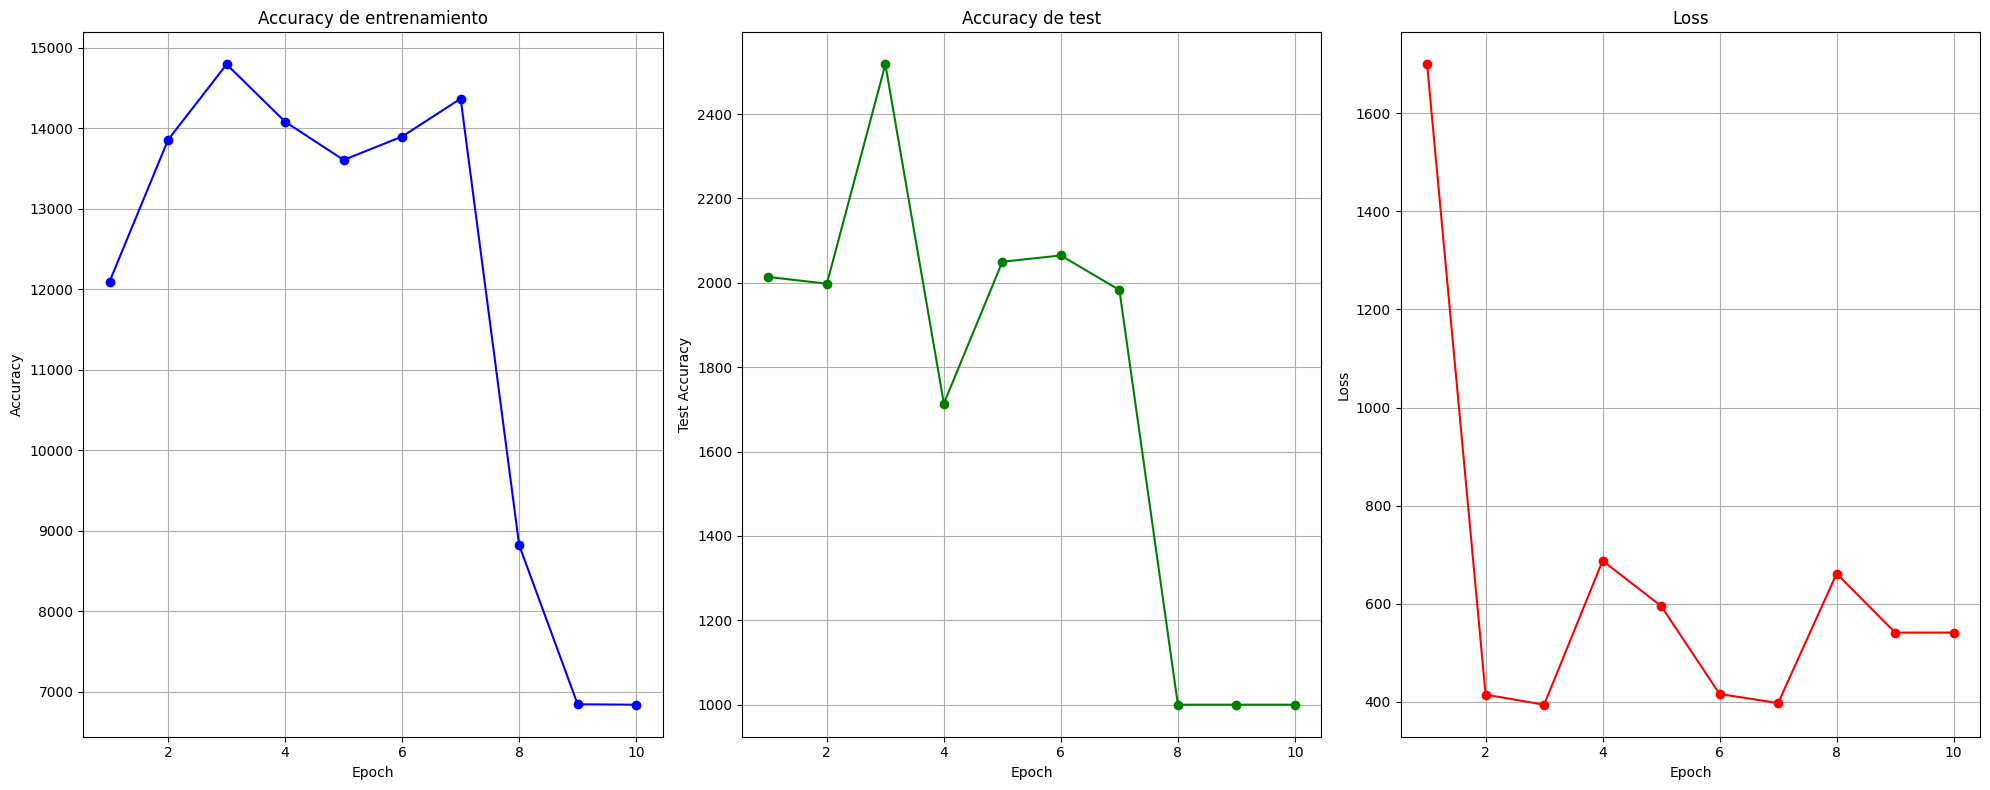

In [ ]:
epochs = [e for (e, _, _, _) in metrics3]
losses = [l.item() for (_, l, _, _) in metrics3]
train_accs = [a for (_, _, a, _) in metrics3]
test_accs = [ta for (_, _, _, ta) in metrics3]

# Crear los gráficos
plt.figure(figsize=(20, 8))

# Gráfico 1: Accuracy de entrenamiento
plt.subplot(1, 3, 1)
plt.plot(epochs, train_accs, marker='o', color='blue')
plt.title("Accuracy de entrenamiento")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# Gráfico 2: Accuracy de test
plt.subplot(1, 3, 2)
plt.plot(epochs, test_accs, marker='o', color='green')
plt.title("Accuracy de test")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.grid(True)

# Gráfico 3: Pérdida (Loss)
plt.subplot(1, 3, 3)
plt.plot(epochs, losses, marker='o', color='red')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()

**Respuesta**: Debido a que el learning rate es muy alto, el modelo se vuelve inestable. Por lo que los valores de la función de pérdida aumentan. También podemos observar como los accuracy arrojan valores bastante bajos comparados con el modelo original.

## Ejercicio 5: Otras Funciones de Activación

Analize el efecto de cambiar las funciones de activación en el accurracy

In [ ]:
#ingresa tu código aquí

import torch.nn as nn

net4 = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 512),
                    nn.Sigmoid(),
                    nn.Linear(512, 128),
                    nn.Sigmoid(),
                    nn.Linear(128, 10))

batch_size4 = 256

train_iter4, test_iter4 = load_data_fashion_mnist(batch_size4)

trainer4 = torch.optim.SGD(net4.parameters(), lr=0.03)
num_epochs4 = 10
loss4 = nn.CrossEntropyLoss()

metrics4 = train(net4, train_iter4, test_iter4, loss4, num_epochs4, trainer4)

(1, tensor(539.9275, grad_fn=<AddBackward0>), 8823.0, 1122.0)
(2, tensor(534.8638, grad_fn=<AddBackward0>), 13870.0, 3039.0)
(3, tensor(524.0477, grad_fn=<AddBackward0>), 21094.0, 3559.0)
(4, tensor(491.0284, grad_fn=<AddBackward0>), 25013.0, 4509.0)
(5, tensor(425.4992, grad_fn=<AddBackward0>), 28357.0, 5020.0)
(6, tensor(366.7112, grad_fn=<AddBackward0>), 31359.0, 5226.0)
(7, tensor(322.5171, grad_fn=<AddBackward0>), 32940.0, 5487.0)
(8, tensor(292.6548, grad_fn=<AddBackward0>), 34216.0, 5773.0)
(9, tensor(272.6247, grad_fn=<AddBackward0>), 35240.0, 6009.0)
(10, tensor(257.5814, grad_fn=<AddBackward0>), 36079.0, 6019.0)


### Conclusión

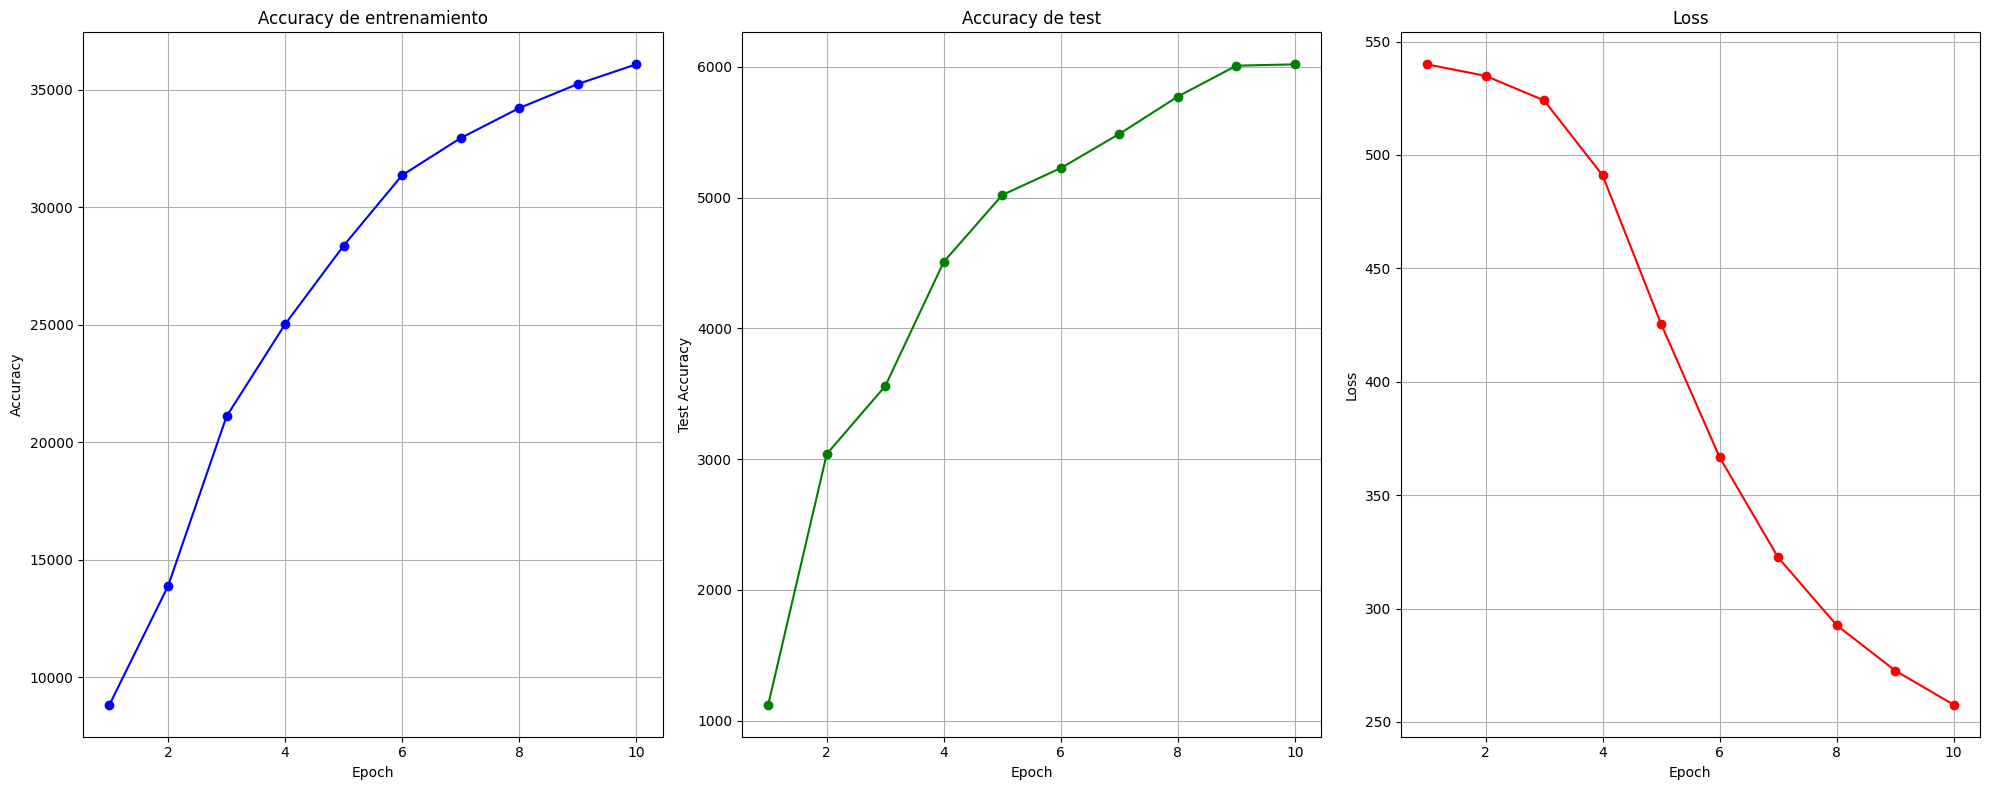

In [ ]:
epochs = [e for (e, _, _, _) in metrics4]
losses = [l.item() for (_, l, _, _) in metrics4]
train_accs = [a for (_, _, a, _) in metrics4]
test_accs = [ta for (_, _, _, ta) in metrics4]

# Crear los gráficos
plt.figure(figsize=(20, 8))

# Gráfico 1: Accuracy de entrenamiento
plt.subplot(1, 3, 1)
plt.plot(epochs, train_accs, marker='o', color='blue')
plt.title("Accuracy de entrenamiento")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# Gráfico 2: Accuracy de test
plt.subplot(1, 3, 2)
plt.plot(epochs, test_accs, marker='o', color='green')
plt.title("Accuracy de test")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.grid(True)

# Gráfico 3: Pérdida (Loss)
plt.subplot(1, 3, 3)
plt.plot(epochs, losses, marker='o', color='red')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()

**Respuesta:** En este caso si cambiamos la función de activación Relu por Sigmoid el modelo se ve perjudicado. Esto es porque sigmoid sirve más para clasificación binaria que para clasificación de imagenes.

## Ejercicio 6: Más Neuronas

Ahora genere un tercer modelo en donde ambas capas tengan 1024 neuronas. Analice si produjo algún cambio en los rendimientos.

In [ ]:
#ingresa tu código aquí

import torch.nn as nn

net5 = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 1024),
                    nn.ReLU(),
                    nn.Linear(1024, 1024),
                    nn.ReLU(),
                    nn.Linear(1024, 10))

batch_size5 = 256

train_iter5, test_iter5 = load_data_fashion_mnist(batch_size5)

trainer5 = torch.optim.SGD(net5.parameters(), lr=0.03)
num_epochs5 = 10
loss5 = nn.CrossEntropyLoss()

metrics5 = train(net5, train_iter5, test_iter5, loss5, num_epochs5, trainer5)

(1, tensor(321.2873, grad_fn=<AddBackward0>), 36837.0, 6999.0)
(2, tensor(170.9056, grad_fn=<AddBackward0>), 45166.0, 7447.0)
(3, tensor(143.0956, grad_fn=<AddBackward0>), 47911.0, 7786.0)
(4, tensor(129.2330, grad_fn=<AddBackward0>), 49170.0, 8080.0)
(5, tensor(121.3264, grad_fn=<AddBackward0>), 49795.0, 8052.0)
(6, tensor(115.0725, grad_fn=<AddBackward0>), 50283.0, 8056.0)
(7, tensor(111.4305, grad_fn=<AddBackward0>), 50673.0, 8020.0)
(8, tensor(107.2217, grad_fn=<AddBackward0>), 50929.0, 8250.0)
(9, tensor(104.2986, grad_fn=<AddBackward0>), 51195.0, 8245.0)
(10, tensor(102.7798, grad_fn=<AddBackward0>), 51372.0, 8244.0)


### Conclusión

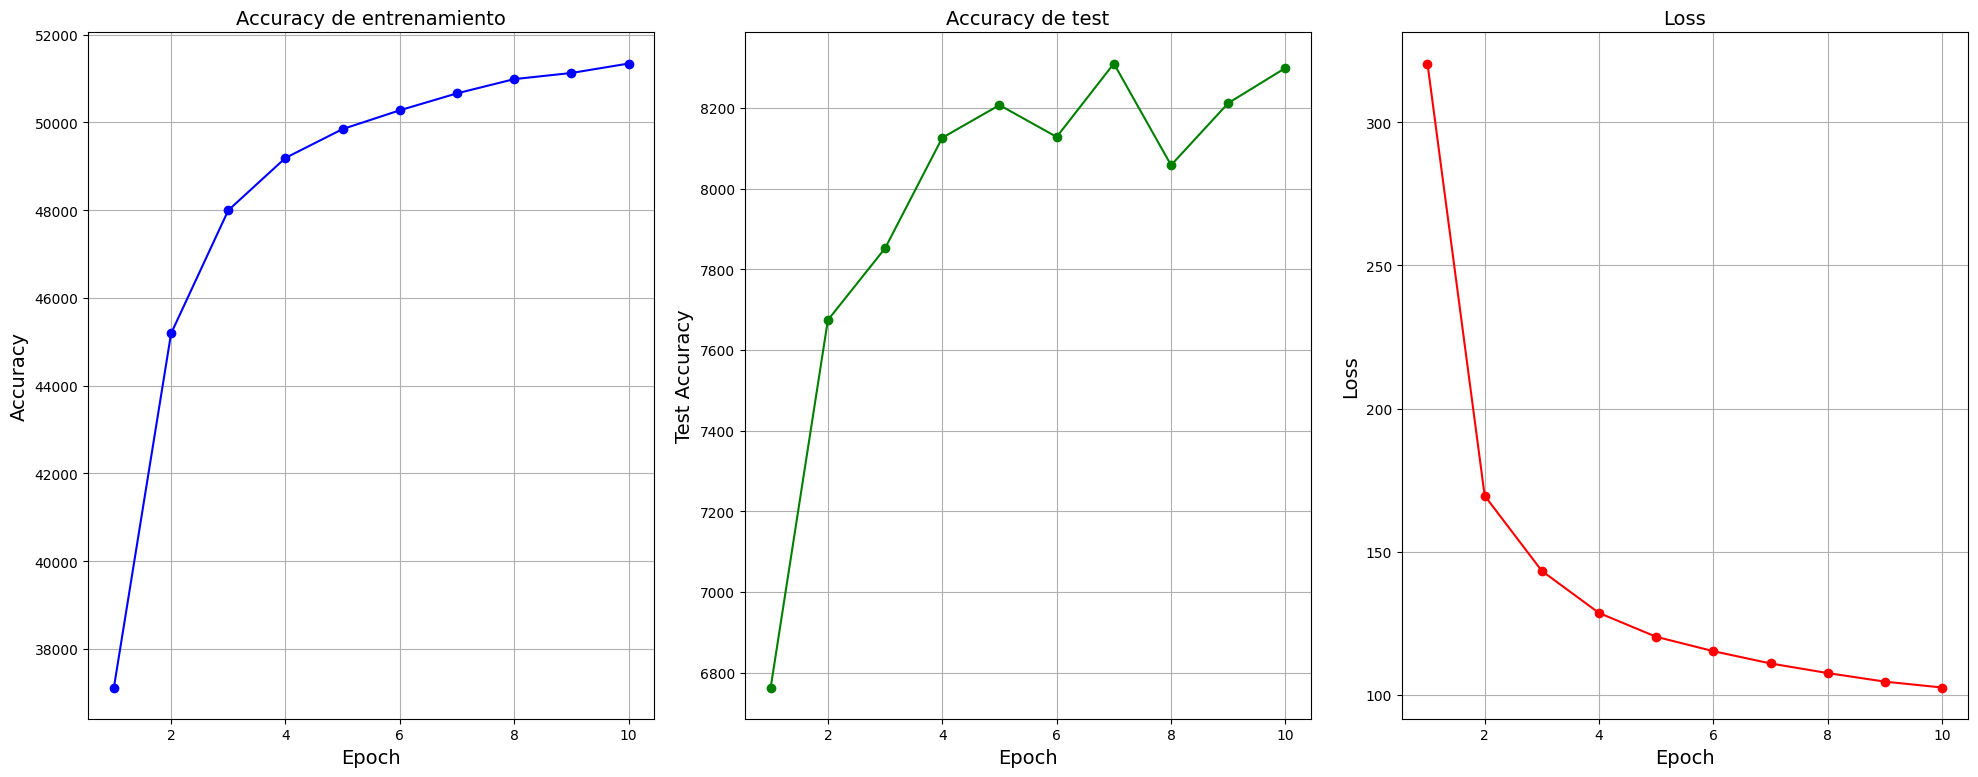

In [ ]:
epochs = [e for (e, _, _, _) in metrics5]
losses = [l.item() for (_, l, _, _) in metrics5]
train_accs = [a for (_, _, a, _) in metrics5]
test_accs = [ta for (_, _, _, ta) in metrics5]

# Crear los gráficos
plt.figure(figsize=(20, 8))

# Gráfico 1: Accuracy de entrenamiento
plt.subplot(1, 3, 1)
plt.plot(epochs, train_accs, marker='o', color='blue')
plt.title("Accuracy de entrenamiento")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# Gráfico 2: Accuracy de test
plt.subplot(1, 3, 2)
plt.plot(epochs, test_accs, marker='o', color='green')
plt.title("Accuracy de test")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.grid(True)

# Gráfico 3: Pérdida (Loss)
plt.subplot(1, 3, 3)
plt.plot(epochs, losses, marker='o', color='red')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()

**Respuesta:** Vemos que tanto en accuracy como el función de pérdida alcanza valores similares al modelo original. Es posible que una red más grande necesite más épocas para que alcance valores mínimos de la función de pérdida.

# Parte 4: Pytorch Avanzado

## Setup

In [ ]:
import sys

In [ ]:
import sklearn

In [ ]:
import torch
from torchvision import transforms
from torch.utils import data
import torchvision


Definiciones adicionales pra que nuestras figuras se vean "bonitas"

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Aprendiendo a quitar el ruido de imágenes

En este notebook vamos a seguir trabajando sobre el dataset FashionMNIST, pero esta vez, en vez de clasificar las imágenes según la prenda que contienen, vamos a modificar las imágenes agregando un ruido aleatorio que una de nuestras redes neuronales aprenderá a quitar.



Arranquemos cargando el dataset.

In [ ]:
torch.manual_seed(42)  # fijamos la semilla para generar reproducibilidad
batch_size = 256

# Dataloader para FashionMNIST
mnist_train = torchvision.datasets.FashionMNIST(transform=transforms.ToTensor(),
        root="../data", train=True, download=True)
mnist_test = torchvision.datasets.FashionMNIST(transform=transforms.ToTensor(),
        root="../data", train=False, download=True)
iter_train, iter_valid =  (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=2),
            data.DataLoader(mnist_test, batch_size, shuffle=True,
                            num_workers=2))

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 265kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.95MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.3MB/s]


Luego vamos a crear un bloque que genere ruido mediante la capa Dropout. Esta capa multiplica por cero pixeles aleatorios de las imágenes con una probabilidad igual a un escalar que pasamos como parámetro.

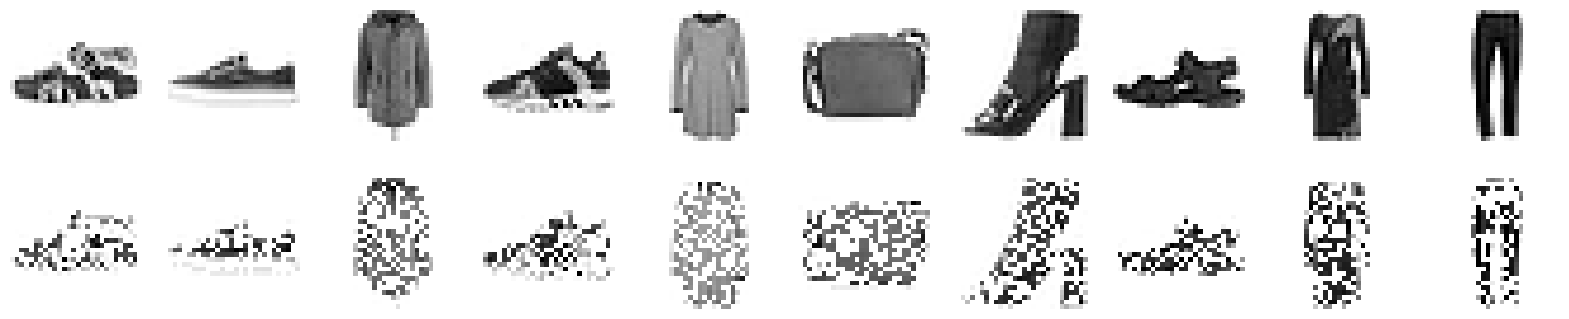

In [ ]:
p=0.5 #probabilidad de que un pixel sea eliminado
noise = torch.nn.Sequential(torch.nn.Dropout(p))

images,_ = next(iter(iter_train))
noise_images = noise(images)

n_images = 10
fig = plt.figure(figsize=(n_images * 2, 4))
for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index].squeeze(),
                   cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(noise_images[image_index].squeeze(),
                   cmap="binary")
        plt.axis("off")




## Denoising Autoencoders

A muy alto nivel, un `autoencoder` (codificador automático) contiene un `encoder` (codificador) y un `decoder` (decodificador). Estas dos partes funcionan automáticamente y dan lugar al nombre de `autoencoder`. El encoder transforma la entrada de alta dimensión en una dimensión más baja (espacio latente, donde la entrada está más comprimida), mientras que un decoder hace el trabajo inverso del encoder en el resultado codificado y reconstruye la imagen original.

![Imgur](https://i.imgur.com/iOp5Vdu.png)

En la tarea de eliminación de ruido, los datos se corrompen de alguna manera para que el modelo pueda aprender a predecir la imagen original. En este caso, la idea es almacenar la salida generada por el encoder como un vector de características de la entrada (llamado vector latente) que está tan comprimido que de alguna manera guarda información solamente de la imagen subyacente y no del ruido. De esta forma, al reconstruir la imagen con el decoder teniendo en cuenta solamente el vector latente como entrada, la salida sería la imagen original sin ruido.

## Ejercicio 1: Construcción del Encoder

En este ejercicio usted deberá crear con pytorch un MLP de 2 capas (con 100 y 30 neuronas respectivamente) que reciba como entrada imágenes de 28*28 y produzca como salida vectores latentes de 30 elementos. No olvide que los MLP necesitan funciones de activación para poder apilar sus capas!!

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


#ingrese su código aquí
class MLPEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()  # Capa para aplanar la entrada
        self.hidden = nn.Linear(28 * 28, 100)  # capa oculta
        self.out = nn.Linear(100, 30)  # capa de salida
    def forward(self, X):
        X = self.flatten(X)  # Aplanar la imagen de entrada
        return self.out(F.relu(self.hidden(X)))

#mantenga este nombre de variable durante todo el notebook para que funcionen los tests
encoder = MLPEncoder()

print(encoder)

MLPEncoder(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (hidden): Linear(in_features=784, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=30, bias=True)
)


In [ ]:
#@title Test N° 1
#@markdown Ejecutar para confirmar que su código es correcto
images,_ = next(iter(iter_train))

try:
  latentes = encoder(images)
  assert latentes.shape[1] == 30, "La salida de su red no es un vector de 30 elementos"
  print("Al parecer está todo bien. Puedes avanzar al siguiente test")
except:
  print("Su encoder no generó una salida válida.\nLa entrada no pudo recorrer todo el camino hasta el final de su red.\nRevise que la dimensionalidad de sus capas sean compatibles")



Al parecer está todo bien. Puedes avanzar al siguiente test


In [ ]:
#@title Test N° 2
#@markdown Ejecutar para confirmar que su código es correcto
assert encoder.hidden.weight.shape == torch.Size([100, 784]), "Las dimensiones de su primera capa densa están mal"
assert encoder.out.weight.shape == torch.Size([30, 100]), "Las dimensiones de su segunda capa densa están mal"
print("Al parecer está todo bien. Puedes avanzar al siguiente ejercicio")

Al parecer está todo bien. Puedes avanzar al siguiente ejercicio


## Ejercicio 2: Construcción del Decoder

En este ejercicio usted deberá crear con pytorch un MLP de 2 capas que sea inverso al decoder que construyo en el ejercicio anterior (con 30 y 100 neuronas respectivamente) que reciba como entrada vectores latentes de 30 elementos y produzca como salida imágenes de 28*28 . No olvide que los MLP necesitan funciones de activación para poder apilar sus capas!!
Tip: para revertir un Flatten() debe usar Unflatten()

In [ ]:
#ingrese su código aquí
class MLPDecoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(30, 100)  # capa oculta
        self.out = nn.Linear(100, 28 * 28)  # capa de salida
        self.unflatten = nn.Unflatten(dim=1, unflattened_size=(28, 28))  # revertir el Flatten

    def forward(self, X):
        X = self.out(F.relu(self.hidden(X)))
        return self.unflatten(X)


#mantenga este nombre de variable durante todo el notebook para que funcionen los tests
decoder = MLPDecoder()

print(decoder)

MLPDecoder(
  (hidden): Linear(in_features=30, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=784, bias=True)
  (unflatten): Unflatten(dim=1, unflattened_size=(28, 28))
)


In [ ]:
#@title Test N° 1
#@markdown Ejecutar para confirmar que su código es correcto
try:
  salidas = decoder(latentes)
  assert salidas.shape[1] == 28 and salidas.shape[2] == 28, "La salida de su red no es una imagen de 28*28"
  print("Al parecer está todo bien. Puedes avanzar al siguiente test")
except:
  print("Su encoder no generó una salida válida.\nLa entrada no pudo recorrer todo el camino hasta el final de su red.\nRevise que la dimensionalidad de sus capas sean compatibles")




Al parecer está todo bien. Puedes avanzar al siguiente test


In [ ]:
#@title Test N° 2
#@markdown Ejecutar para confirmar que su código es correcto
assert decoder.hidden.weight.shape == torch.Size([100, 30]), "Las dimensiones de su primera capa densa están mal"
assert decoder.out.weight.shape == torch.Size([784, 100]), "Las dimensiones de su segunda capa densa están mal"
print("Al parecer está todo bien. Puedes avanzar al siguiente ejercicio")

Al parecer está todo bien. Puedes avanzar al siguiente ejercicio


## Ejercicio 3: Crear un autoencoder
En este ejercicio deberás crear un bloque que consista en los bloques noise, encoder y decoder creados anteriormente encadenados. Tanto la slaida como la entrada de este bloque deben ser imágenes de 28*28

In [ ]:
#ingrese su código aquí
#mantenga este nombre de variable durante todo el notebook para que funcionen los tests
net = nn.Sequential(
    noise,
    encoder,
    decoder
)

print(net)

Sequential(
  (0): Sequential(
    (0): Dropout(p=0.5, inplace=False)
  )
  (1): MLPEncoder(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (hidden): Linear(in_features=784, out_features=100, bias=True)
    (out): Linear(in_features=100, out_features=30, bias=True)
  )
  (2): MLPDecoder(
    (hidden): Linear(in_features=30, out_features=100, bias=True)
    (out): Linear(in_features=100, out_features=784, bias=True)
    (unflatten): Unflatten(dim=1, unflattened_size=(28, 28))
  )
)


In [ ]:
#@title Test N° 1
#@markdown Ejecutar para confirmar que su código es correcto
try:
  salidas = net(images)
  assert salidas.size == salidas.size, "La salida de su red no tiene el mismo tamaño que la entrada"
  print("Al parecer está todo bien. Puedes avanzar al siguiente test")
except:
  print("Su encoder no generó una salida válida.\nLa entrada no pudo recorrer todo el camino hasta el final de su red.\nRevise que la dimensionalidad de sus capas sean compatibles")




Al parecer está todo bien. Puedes avanzar al siguiente test


In [ ]:
#@title Test N° 2
#@markdown Ejecutar para confirmar que su código es correcto
assert net[0] == noise, "Tu primer bloque no es el correcto"
assert net[1] == encoder, "Tu segundo bloque no es el correcto"
assert net[2] == decoder, "Tu tercer bloque no es el correcto"
print("Al parecer está todo bien. Puedes avanzar al siguiente test")


Al parecer está todo bien. Puedes avanzar al siguiente test


## Ejercicio 4: Entrenar el Autoencoder

Antes de entrenar debemos definir la pérdida. Nuestro objetivo es que la salida de la red sea exactamente igual que la entrada. Por lo tanto, debemos establecer como etiquetas a las imágenes de entrada y compararlas mediante el error cuadrático medio.

In [ ]:
loss = torch.nn.MSELoss()

Para obtener un mejor rendimiento usaremos Adam como algoritmo de optimización en lugar de SGD. En la última clase explicaremos algunas diferencias entre ambos.

In [ ]:
trainer = torch.optim.Adam(net.parameters())

Un último detalle es que la capa Dropout se comporta diferente si la red está entrenando o prediciendo. Así que debemos indicarle a PyTorch que la red está en modo entrenamiento con la función `train()`

In [ ]:
net.train()

Sequential(
  (0): Sequential(
    (0): Dropout(p=0.5, inplace=False)
  )
  (1): MLPEncoder(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (hidden): Linear(in_features=784, out_features=100, bias=True)
    (out): Linear(in_features=100, out_features=30, bias=True)
  )
  (2): MLPDecoder(
    (hidden): Linear(in_features=30, out_features=100, bias=True)
    (out): Linear(in_features=100, out_features=784, bias=True)
    (unflatten): Unflatten(dim=1, unflattened_size=(28, 28))
  )
)

En la siguiente celda deberá entrenar la red por 50 épocas

In [ ]:
#ingrese su código aquí
num_epochs = 50

for epoch in range(num_epochs):
    for images, _ in iter_train:
        noise_images = noise(images.squeeze(1))
        decoded_images = net(noise_images)

        l = loss(decoded_images, images.squeeze(1))

        trainer.zero_grad()
        l.backward()
        trainer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {l.item()}")

print("Training completed.")

Epoch 1/50, Loss: 0.03046329692006111
Epoch 2/50, Loss: 0.025965869426727295
Epoch 3/50, Loss: 0.026344383135437965
Epoch 4/50, Loss: 0.022243913263082504
Epoch 5/50, Loss: 0.023641787469387054
Epoch 6/50, Loss: 0.02306544780731201
Epoch 7/50, Loss: 0.021174559369683266
Epoch 8/50, Loss: 0.023786339908838272
Epoch 9/50, Loss: 0.022116800770163536
Epoch 10/50, Loss: 0.020419705659151077
Epoch 11/50, Loss: 0.02011149935424328
Epoch 12/50, Loss: 0.022198470309376717
Epoch 13/50, Loss: 0.020464563742280006
Epoch 14/50, Loss: 0.022468144074082375
Epoch 15/50, Loss: 0.019363364204764366
Epoch 16/50, Loss: 0.019162271171808243
Epoch 17/50, Loss: 0.01879189722239971
Epoch 18/50, Loss: 0.021408526226878166
Epoch 19/50, Loss: 0.019754713401198387
Epoch 20/50, Loss: 0.01913786493241787
Epoch 21/50, Loss: 0.01946987956762314
Epoch 22/50, Loss: 0.02137899026274681
Epoch 23/50, Loss: 0.01970541477203369
Epoch 24/50, Loss: 0.020257581025362015
Epoch 25/50, Loss: 0.017731739208102226
Epoch 26/50, Loss

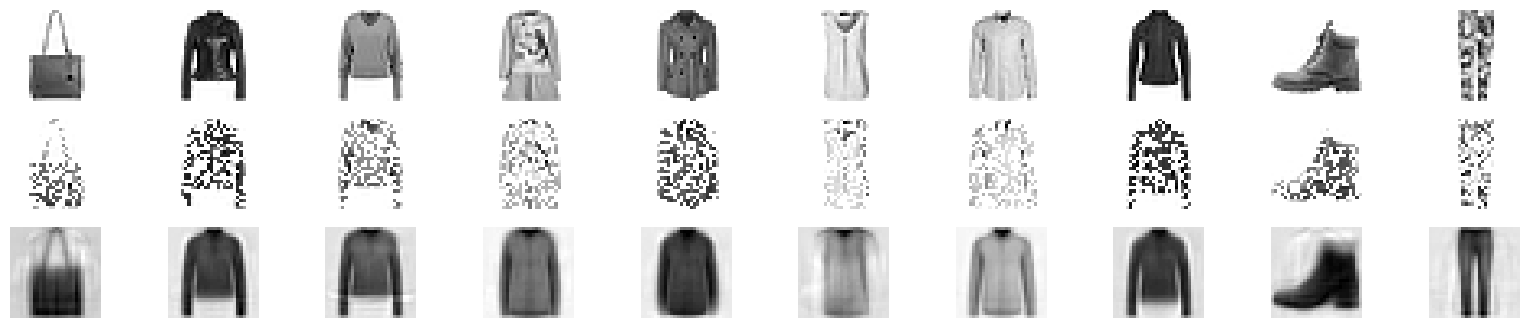

In [ ]:
#@title Grafique Predicciones de Validación
# Codigo adicional para generar imágenes.
import numpy as np


def plot_reconstructions(model, images=iter_valid, n_images=10):
    noise = torch.nn.Sequential(torch.nn.Dropout(0.5))
    noise.train()
    input = noise(images)
    noise.eval()
    model.eval()
    reconstructions = np.clip(input[:n_images].squeeze().detach(), 0, 1)
    reconstructions = model(reconstructions).squeeze().detach()
    fig = plt.figure(figsize=(n_images * 2, 4))
    for image_index in range(n_images):
        plt.subplot(3, n_images, 1 + image_index)
        plt.imshow(images[image_index].squeeze(),
                   cmap="binary")
        plt.axis("off")
        plt.subplot(3, n_images, 1 + n_images + image_index)
        plt.imshow(input[image_index].squeeze(),
                   cmap="binary")
        plt.axis("off")
        plt.subplot(3, n_images, 1 + 2 * n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

net.eval()
plot_reconstructions(net, next(iter(iter_valid))[0])
plt.show()

## Ejercicio 5: Modificar la fuente del Ruido

Intentemos usar un modelo similar, pero esta vez generemos un error gaussiano sobre las imágenes en vez de simplemente eliminar píxeles al azar. La siguiente función altera las imágenes agregando un error gaussiano.

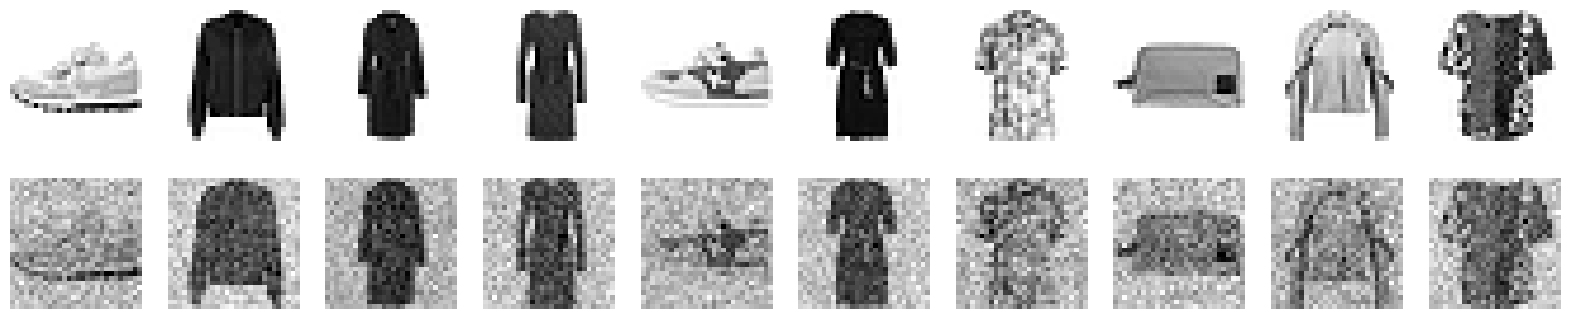

In [ ]:
def addGaussianNoise(tensor, mean, std):
  return tensor + torch.randn_like(tensor) * std + mean

images,_ = next(iter(iter_train))
noise_images = addGaussianNoise(images,0,0.15)

n_images = 10
fig = plt.figure(figsize=(n_images * 2, 4))
for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index].squeeze(),
                   cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(noise_images[image_index].squeeze(),
                   cmap="binary")
        plt.axis("off")

Ahora generemos una nueva red que en vez de eliminar un ruido producido por dropout, elimine un ruido gaussiano producido por la función `addGaussianNoise()`. Para hacerlo tenga en cuenta los siguientes detalles:


1.   El paquete nn.Module nos permite crear tanto capas como modelos completos personalizados. Utilice alguna de estas opciones para implementar este modelo.
2.   Tenga en cuenta que el ruido gaussiano solo debe agregarse a la imagen si el modelo está siendo entrenado. El atributo `training` de cualquier bloque que herede de nn.Module funciona como bandera que se pone en `True` si el modelo está entrenando y en `False` si ya está entrenada y se la usa para generar predicciones. El método `train()` pone esta bandera en `True` y el método `eval()` la pone en `False`



In [ ]:
## ingrese su código aquí
class MLPEncoderGaussian(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(28 * 28, 100)
        self.out = nn.Linear(100, 30)

    def forward(self, X):
        X = self.flatten(X)
        if self.training:
          X = addGaussianNoise(X, 0.0, 0.15)
        return self.out(F.relu(self.hidden(X)))

encoder1 = MLPEncoderGaussian()

class MLPDecoderGaussian(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(30, 100)
        self.out = nn.Linear(100, 28 * 28)
        self.unflatten = nn.Unflatten(dim=1, unflattened_size=(28, 28))

    def forward(self, X):
        X = self.out(F.relu(self.hidden(X)))
        return self.unflatten(X)

decoder1 = MLPDecoderGaussian()

netGaussian1 = nn.Sequential(
    encoder1,
    decoder1
)

## Ejercicio 6: Entrenar el modelo con ruido gaussiano

Entrene el modelo creado en el ejercicio anterior

In [ ]:
#ingrese su código aquí

loss6 = torch.nn.MSELoss()
trainer6 = torch.optim.Adam(netGaussian1.parameters())
netGaussian1.train()

num_epochs = 50

for epoch in range(num_epochs):
    for images, _ in iter_train:
        noise_images = noise(images.squeeze(1))
        decoded_images = netGaussian1(noise_images)

        l = loss6(decoded_images, images.squeeze(1))

        trainer6.zero_grad()
        l.backward()
        trainer6.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {l.item()}")

print("Training completed.")

Epoch 1/50, Loss: 0.029193708673119545
Epoch 2/50, Loss: 0.023664996027946472
Epoch 3/50, Loss: 0.02317526564002037
Epoch 4/50, Loss: 0.020768050104379654
Epoch 5/50, Loss: 0.02011294849216938
Epoch 6/50, Loss: 0.01901896297931671
Epoch 7/50, Loss: 0.01916002668440342
Epoch 8/50, Loss: 0.0190330371260643
Epoch 9/50, Loss: 0.02090269885957241
Epoch 10/50, Loss: 0.020579494535923004
Epoch 11/50, Loss: 0.019563378766179085
Epoch 12/50, Loss: 0.017445271834731102
Epoch 13/50, Loss: 0.018022682517766953
Epoch 14/50, Loss: 0.01980307325720787
Epoch 15/50, Loss: 0.017136525362730026
Epoch 16/50, Loss: 0.019318262115120888
Epoch 17/50, Loss: 0.01842920295894146
Epoch 18/50, Loss: 0.017063084989786148
Epoch 19/50, Loss: 0.01844877004623413
Epoch 20/50, Loss: 0.018208840861916542
Epoch 21/50, Loss: 0.017056521028280258
Epoch 22/50, Loss: 0.01815820299088955
Epoch 23/50, Loss: 0.018658272922039032
Epoch 24/50, Loss: 0.018848536536097527
Epoch 25/50, Loss: 0.017390044406056404
Epoch 26/50, Loss: 0

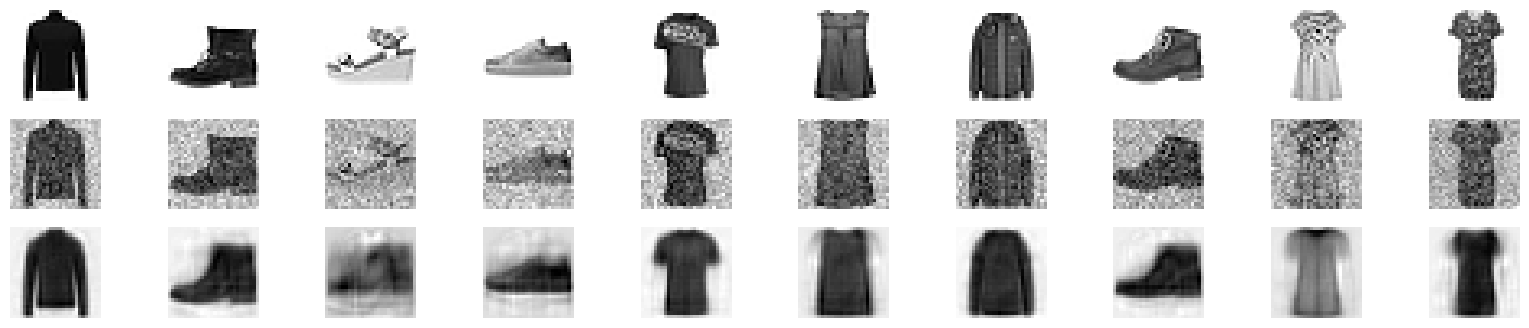

In [ ]:
#@title Grafique Predicciones de Validación
# Codigo adicional para generar imágenes.
import numpy as np


def plot_reconstructions(model, images=iter_valid, n_images=10):
    input = addGaussianNoise(images,0,0.15)
    model.eval()
    reconstructions = np.clip(input[:n_images].squeeze().detach(), 0, 1)
    reconstructions = model(reconstructions).squeeze().detach()
    fig = plt.figure(figsize=(n_images * 2, 4))
    for image_index in range(n_images):
        plt.subplot(3, n_images, 1 + image_index)
        plt.imshow(images[image_index].squeeze(),
                   cmap="binary")
        plt.axis("off")
        plt.subplot(3, n_images, 1 + n_images + image_index)
        plt.imshow(input[image_index].squeeze(),
                   cmap="binary")
        plt.axis("off")
        plt.subplot(3, n_images, 1 + 2 * n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

netGaussian1.eval()
plot_reconstructions(netGaussian1, next(iter(iter_valid))[0])
plt.show()

# Parte 5: Selección de Modelos

Para llevar adelante los ejercicios de este notebook vamos a recuperar los modelos que construimos en la clase 3 para clasificación sobre FashionMNIST.

In [ ]:
import torch
from torch import nn

INPUT = 28 * 28
OUTPUT = 10

net1 = nn.Sequential(nn.Flatten(),
                    nn.Linear(INPUT, 512),
                    nn.ReLU(),
                    nn.Linear(512, 128),
                    nn.ReLU(),
                    nn.Linear(128, OUTPUT))

net2 = nn.Sequential(nn.Flatten(),
                    nn.Linear(INPUT, 512),
                    nn.Sigmoid(),
                    nn.Linear(512, 128),
                    nn.Sigmoid(),
                    nn.Linear(128, OUTPUT))

net3 = nn.Sequential(nn.Flatten(),
                    nn.Linear(INPUT, 1024),
                    nn.ReLU(),
                    nn.Linear(1024, 1024),
                    nn.ReLU(),
                    nn.Linear(1024, OUTPUT))

Ahora repetiremos la evaluación que hicimos en esa clase, pero llevándola adelante de manera más exhaustiva con K-fold Cross Validation. Para eso, cargaremos **solo los datos de testeo** de FasionMNIST y fingiremos que esos 10000 ejemplos son todos los que tenemos.

In [ ]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

data_iter = datasets.FashionMNIST(
        root="../data", train=False, transform=transforms.ToTensor(), download=True)

## Ejercicio
Verifique cuál de los modelos anteriores es el mejor llevando adelante proceso de cross validation con 3 folds y entrenando por 20 epochs. Reutilice todas las funciones que necesite de los notebooks de teoría de la clase 5 y de todos los ejercicios anteriores.

Nota: le recomendamos que guarde las accuracy tanto de testeo como de entrenamiento porque le servirán para más adelante.

In [4]:
#inserte su código aquí
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.model_selection import KFold


def reset_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        m.reset_parameters()

def train(fold, model, device, loss_fn, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target).mean()
        loss.backward()
        optimizer.step()

def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

def test_accuracy(fold, model, loss_fn, device, test_loader):
    model.eval()
    TestAcc = 0
    N = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            N += y.numel()
            TestAcc += accuracy(model(X), y)
    acc = TestAcc / N
    print(f"Fold {fold} - Test Accuracy: {TestAcc}/{N} ({100. * acc:.2f}%)")
    return acc

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

batch_size = 32
epochs = 20
n_splits = 3


model_list = [net1, net2, net3]

for i, net in enumerate(model_list, start=1):
    print(f"\n Modelo {i}")
    acc_per_fold = []
    kfold = KFold(n_splits=n_splits, shuffle=True)

    for fold, (train_idx, test_idx) in enumerate(kfold.split(data_iter)):
        model = net.to(device)
        model.apply(reset_weights)
        optimizer = optim.Adadelta(model.parameters())
        loss_fn = nn.CrossEntropyLoss(reduction='none')

        train_sampler = SubsetRandomSampler(train_idx)
        test_sampler = SubsetRandomSampler(test_idx)

        train_loader = DataLoader(data_iter, batch_size=batch_size, sampler=train_sampler)
        test_loader = DataLoader(data_iter, batch_size=batch_size, sampler=test_sampler)

        for epoch in range(1, epochs + 1):
            train(fold, model, device, loss_fn, train_loader, optimizer, epoch)

        acc = test_accuracy(fold, model, loss_fn, device, test_loader)
        acc_per_fold.append(acc)

    avg_acc = np.mean(acc_per_fold)
    print(f"\nAccuracy promedio {i}: {100. * avg_acc:.2f}%\n")


Using device: cpu


NameError: name 'net1' is not defined

Respuesta: El mejor modelo es el primero ya que tiene un Accuracy promedio mayor que los otros dos.